In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
from operator import attrgetter
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

In [2]:
#Загрузка датасетов
clients_original = pd.read_csv("olist_customers_dataset.csv")
orders_original = pd.read_csv("olist_orders_dataset.csv")
order_items_original = pd.read_csv("olist_order_items_dataset.csv")

In [3]:
#Копируем датасеты в новые переменные, чтобы не повредить оригинальные
clients = clients_original.copy()
orders = orders_original.copy()
order_items = order_items_original.copy()

Посмотрим на данные

In [4]:
clients.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Поработаем с данными

In [7]:
#Приводим даты в удобный формат
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

Создадим датасет, приджойнив к clients табличку orders, чтобы получить удобный доступ к столбцам customer_unique_id и order_id в одной табличке.

In [8]:
client_orders_all = pd.merge(clients, orders, on="customer_id", how='inner')

**Задача 1. Оценить месячный retention в оформление заказа с помощью когортного анализа.**

Будем считать retention только по завершенным заказам.

In [9]:
client_orders_delivered = client_orders_all.copy()


In [10]:
client_orders_delivered = client_orders_delivered.query("order_status == 'delivered' ")

Подготовим данные для разбитиения по когортам.

In [11]:
# Извлекаем месяц и день заказа
client_orders_delivered['order_period'] = client_orders_delivered['order_purchase_timestamp'].dt.to_period('M')
client_orders_delivered['order_period_day'] = client_orders_delivered['order_purchase_timestamp'].dt.to_period('D')

In [12]:
# Присваиваем когорты на основе даты первого действия для каждого пользователя
client_orders_delivered['cohort'] = client_orders_delivered.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
client_orders_delivered['cohort_day'] = client_orders_delivered.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

In [13]:
# Рассчитываем номер периода в днях (месячные периоды, деля на 30)
client_orders_delivered['period_number_month'] = np.floor((client_orders_delivered.order_period_day - client_orders_delivered.cohort_day).apply(attrgetter('n')) / 30)

In [14]:
client_orders_delivered.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_period,order_period_day,cohort,cohort_day,period_number_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05-16,2017-05,2017-05-16,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018-01-12,2018-01,2018-01-12,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018-05-19,2018-05,2018-05-19,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018-03-13,2018-03,2018-03-13,0.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018-07-29,2018-07,2018-07-29,0.0


In [15]:
# Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)
df_cohort = client_orders_delivered.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()

In [16]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [17]:
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что данные за 2016 год непрезентативны. Поэтому рассматривать их не будем и ограничимся периодом с 2017-01

In [18]:
cohort_pivot.index = cohort_pivot.index.astype(str)

In [19]:
cohort_pivot = cohort_pivot.drop(index='2016-09')
cohort_pivot = cohort_pivot.drop(index='2016-10')
cohort_pivot = cohort_pivot.drop(index='2016-12')

In [20]:
client_orders_delivered = client_orders_delivered.drop(client_orders_delivered[client_orders_delivered['cohort'] == '2016-09'].index)
client_orders_delivered = client_orders_delivered.drop(client_orders_delivered[client_orders_delivered['cohort'] == '2016-10'].index)
client_orders_delivered = client_orders_delivered.drop(client_orders_delivered[client_orders_delivered['cohort'] == '2016-12'].index)

In [21]:
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,3752.0,14.0,10.0,9.0,12.0,7.0,10.0,7.0,5.0,10.0,...,9.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4057.0,27.0,10.0,14.0,15.0,19.0,10.0,10.0,6.0,7.0,...,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4004.0,21.0,18.0,13.0,14.0,9.0,11.0,6.0,13.0,7.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]
# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [23]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.003731,0.002665,0.002399,0.003198,0.001866,0.002665,0.001866,0.001333,0.002665,...,0.002399,0.001599,0.001866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006655,0.002465,0.003451,0.003697,0.004683,0.002465,0.002465,0.001479,0.001725,...,0.001725,0.000739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.005245,0.004496,0.003247,0.003497,0.002248,0.002747,0.001499,0.003247,0.001748,...,0.000250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


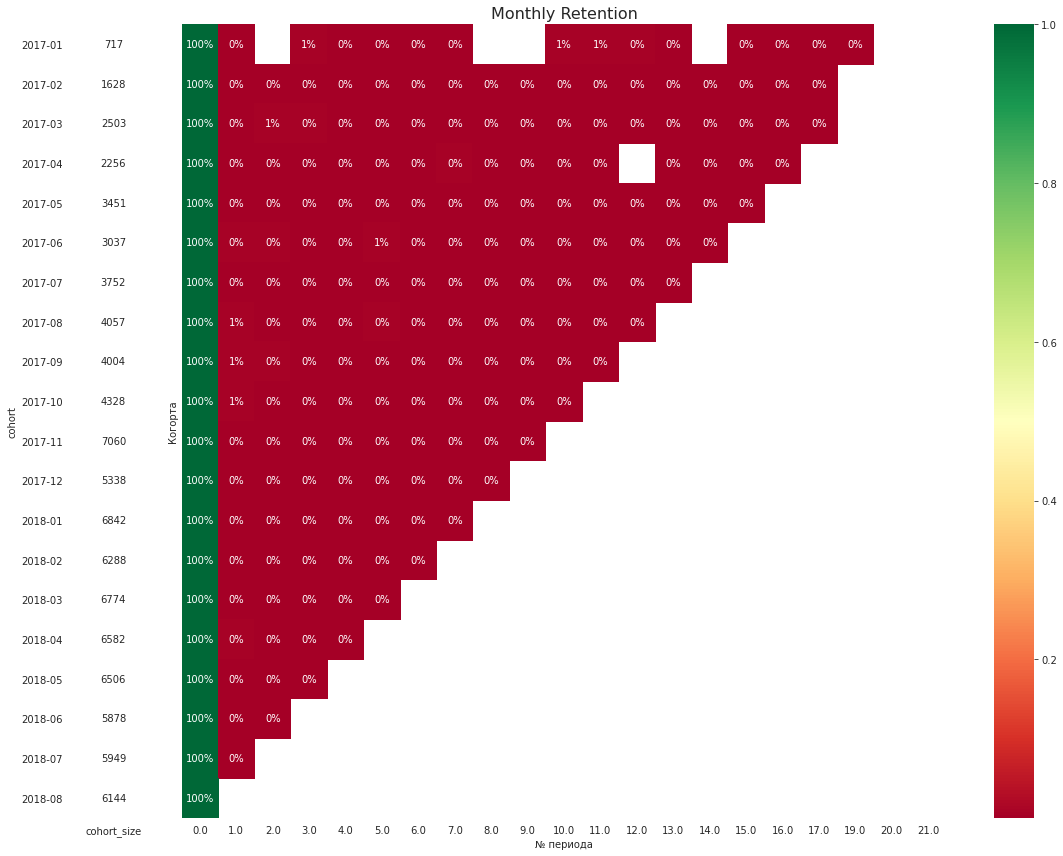

In [24]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

Видим, что у продукта практически всегда нулевая возвращаемость. Значит клиенты, сделав заказ 1 раз, уходят из маркетплейса в большинстве случаев.

In [25]:
#Вычислим медианный retention 1-го месяца
median_1_month = retention_matrix[1.0].median()
median_1_month

0.0035460992907801418

In [26]:
#Найдем когорту с самым высоким retention на 3-й месяц
max_retention = retention_matrix[3.0].max()
retention_matrix[retention_matrix[3.0] == max_retention].index.tolist()

['2017-01']

Вывод: из полученного нами когорного анализа видно, что у продукта есть большая проблема с низкой возвращаемостью клиентов. Максимальный retention за все время составляет 1%. При этом медианный retention 1 месяца равен 0.35%, а когорта с самым высоким retention 2017-01.

**Задача 2. Определить, существует ли product/market fit у маркетплейса.**

PMF показывает нам, как часто пользователи используют наш продукт для решения какой-либо задачи. Поэтому для его измерения мы можем использовать метрику retention. Как мы видим из когорного анализа, максимальное значение retention за весь период равняется 1%. Это говорит нам о том, что после совершения одной покупки пользователи к нам не возвращаются. Для того чтобы удостовериться в этом посмотрим график для когорты с самым высоким retention на 3-й месяц - 2017-01.

In [27]:
df_cohort['cohort_str'] = df_cohort['cohort'].astype(str)

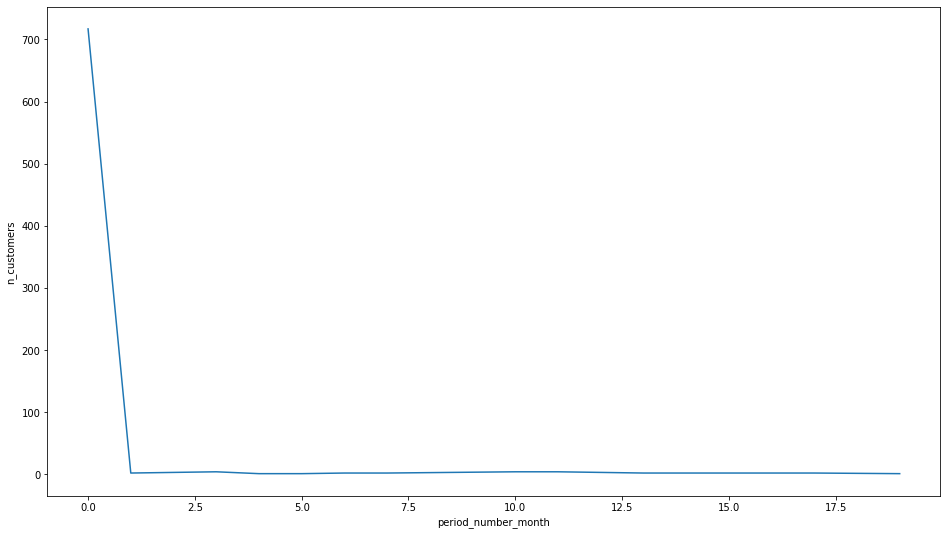

In [28]:
plt.figure(figsize=(16, 9))
sns.lineplot(x ='period_number_month', y='n_customers', data = df_cohort.query('cohort_str == "2017-01"'))

Видим резкое снижение количества активных клиентов. Теперь посмотрим на общую картину за все когорты.

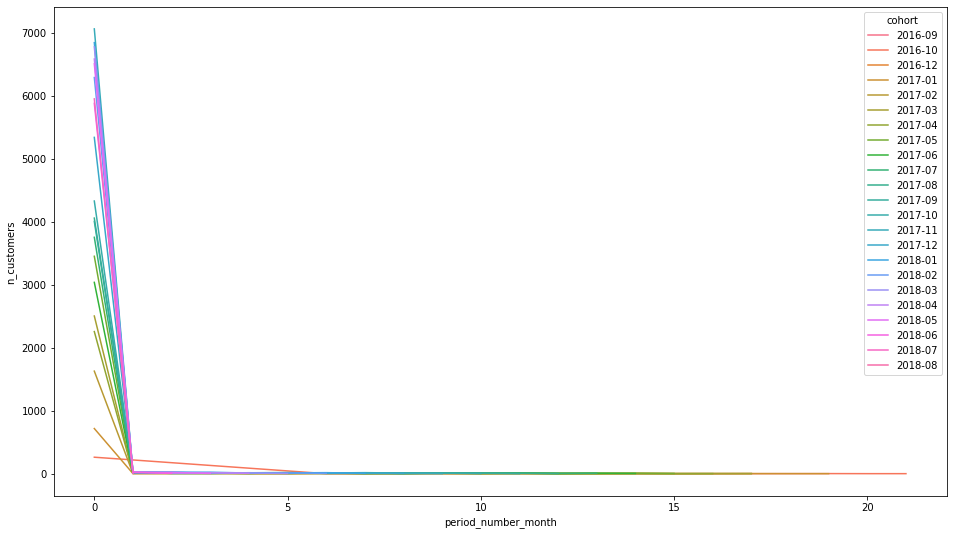

In [29]:
plt.figure(figsize=(16, 9))
sns.lineplot(x ='period_number_month', y='n_customers', hue = 'cohort',data = df_cohort)

Во всех когортах ситуация аналогичная.
Далее посчитаем, какое среднее количество заказов делает 1 клиент.

In [30]:
all_orders = client_orders_delivered.order_id.nunique()
all_clients = client_orders_delivered.customer_unique_id.nunique()
mean_orders_for_client = all_orders/all_clients
mean_orders_for_client

1.0333641265817346

Делаем вывод, что у нашего продукта нет PMF, так как клиенты не остаются с нами после первого заказа. Это подтверждает низкий retention и вычисленное среднее количество заказов одного клиента, равное 1,033 заказа. Перед дальнейшим маштабированием продукта необходимо решить проблему низкой возвращаемости клиентов.

Посчитаем среднее время доставки заказа.

In [31]:
#Приводим колонку к нужному типу данных
client_orders_delivered['order_delivered_customer_date'] = pd.to_datetime(client_orders_delivered['order_delivered_customer_date'])

In [32]:
#Посчитаем время доставки заказа
client_orders_delivered['delivered_time'] = client_orders_delivered.order_delivered_customer_date - client_orders_delivered.order_purchase_timestamp

In [33]:
client_orders_delivered['delivered_time']

0        8 days 19:30:00
1       16 days 15:52:55
2       26 days 01:51:06
3       14 days 23:57:47
4       11 days 11:04:18
              ...       
99436    6 days 04:18:20
99437    7 days 10:34:23
99438   30 days 22:51:25
99439   12 days 22:50:06
99440    7 days 04:15:13
Name: delivered_time, Length: 96200, dtype: timedelta64[ns]

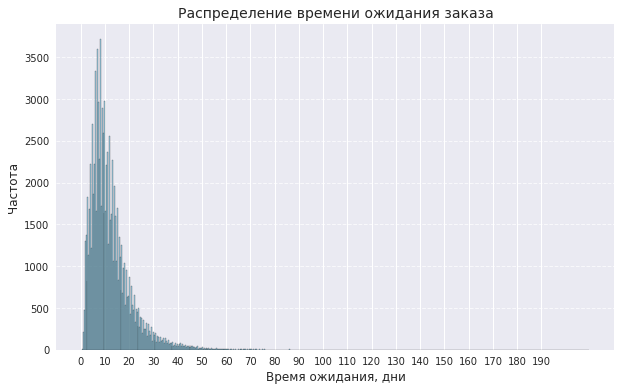

In [34]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

# Построение гистограммы
plt.hist(client_orders_delivered['delivered_time'].dt.total_seconds() / 3600 / 24, bins='auto', color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Распределение времени ожидания заказа', fontsize=14)
plt.xlabel('Время ожидания, дни', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.xticks([i for i in range(0,200,10)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [35]:
#Среднее время доставки заказа
client_orders_delivered.delivered_time.median(), client_orders_delivered.delivered_time.mean()

(Timedelta('10 days 05:02:40'), Timedelta('12 days 12:55:54.637880489'))

Посчитаем, какой процент доставок осуществился с опозданием предполагаемых сроков.

In [36]:
#Приводим колонку к нужному типу данных
client_orders_delivered['order_estimated_delivery_date'] = pd.to_datetime(client_orders_delivered['order_estimated_delivery_date'])

In [37]:
#Посчитаем как часто задерживалась доставка
#Если опоздала 1, если вовремя 0
client_orders_delivered['delayed_delivery'] = (client_orders_delivered.order_delivered_customer_date - client_orders_delivered.order_estimated_delivery_date)\
                    .apply(lambda x: 1 if x.days > 0 else 0)

In [38]:
client_orders_delivered.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_period,order_period_day,cohort,cohort_day,period_number_month,delivered_time,delayed_delivery
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05-16,2017-05,2017-05-16,0.0,8 days 19:30:00,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018-01-12,2018-01,2018-01-12,0.0,16 days 15:52:55,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018-05-19,2018-05,2018-05-19,0.0,26 days 01:51:06,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018-03-13,2018-03,2018-03-13,0.0,14 days 23:57:47,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018-07-29,2018-07,2018-07-29,0.0,11 days 11:04:18,0


In [39]:
client_orders_delivered.delayed_delivery.sum() * 100 / all_orders

6.788981288981289

Получили, что 6% заказов были доставлены с опозданием. Это нормальный показатель, для международных грузоперевозок. Однако, это все равно негативно влияет на расположение к нашему маркетплейсу у пользователя.

После исследования данных можно предположить, что причинами низкого PMF могут быть:  
1. Плохой PCF  
   Можно заметить, что за последний год у нас не сильно изменилось количество новых клиентов в месяц. Это может говорить о плохом PCF. Возможно, используется неэффективный канал привличения клиентов.  
2. Привлекается незаинтересованная аудитория  
    Из 1 пункта также можно предположить, что у продукта выстроен неверный таргетинг: нет четкого понимания на какую аудиторию будет настроен наш продукт и маркетплейс привлекает не тех пользователей.  
3. Дальняя доставка  
    Проблемы с логистикой и сроками доставки также могут сказываться на PMF. Пользователей будет отталкивать большое время (среднее время доставки составило 12 дней, большая часть людей ждет заказ от 6 до 10 дней) и стоимость доставки заказа из Бразилии.  
4. Проблемы при оформлении заказа  
5. Проблемы при оплате заказа     

**Задача 3. Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.**

Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.  
1. Первая метрика должна отражать рост объёма продаж маркетплейса.  
    GMV Gross Merchandise Volume  
    Вычисляется как суммарная стоимость всех проданных товаров. При улучшении заметим сильный рост.  
2. Вторая — показывать объем аудитории, которой продукт доставляет ценность.  
    MAU  
    Покажет, сколько уникальных пользователей делают заказ за месяц.  
3. Третья — отражать заинтересованность новых клиентов в продукте.  
    Конверсия в покупку на нового клиента  
    Покажет % новых пользователей, совершивших первую покупку.  
4. Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.  
    Конверсия в вторую покупку  
    Покажет, насколько клиенты удовлетворены и вовлечены  
5. Пятая — отражать денежное выражение вовлеченности клиента.  
    ARPU  
    Покажет прибыль, которую мы получаем с клиента за определенный период   

Визуализируем первую метрику - GMV.

In [40]:
#Считаем сумму каждого заказа
order_price_sum  = order_items.groupby('order_id', as_index=False)\
    .agg({'price':'sum'})
#Создаем датафрейм с суммой и периодом заказа
gmv = order_price_sum.merge(client_orders_delivered[['order_id', 'order_period']], on='order_id', how='left')
gmv_agg = gmv.groupby('order_period', as_index=False)\
    .agg({'price':'sum'})\
    .sort_values(by='order_period', ascending=True)
gmv_agg['all_sum']= gmv_agg['price'].cumsum()

In [41]:
gmv_agg.head()

,order_period,price,all_sum
0,2017-01,111787.46,111787.46
1,2017-02,234223.40,346010.86
2,2017-03,359198.85,705209.71
3,2017-04,340569.69,1045779.40
4,2017-05,489338.25,1535117.65


In [42]:
gmv_agg['order_period_str'] = gmv_agg['order_period'].astype(str)

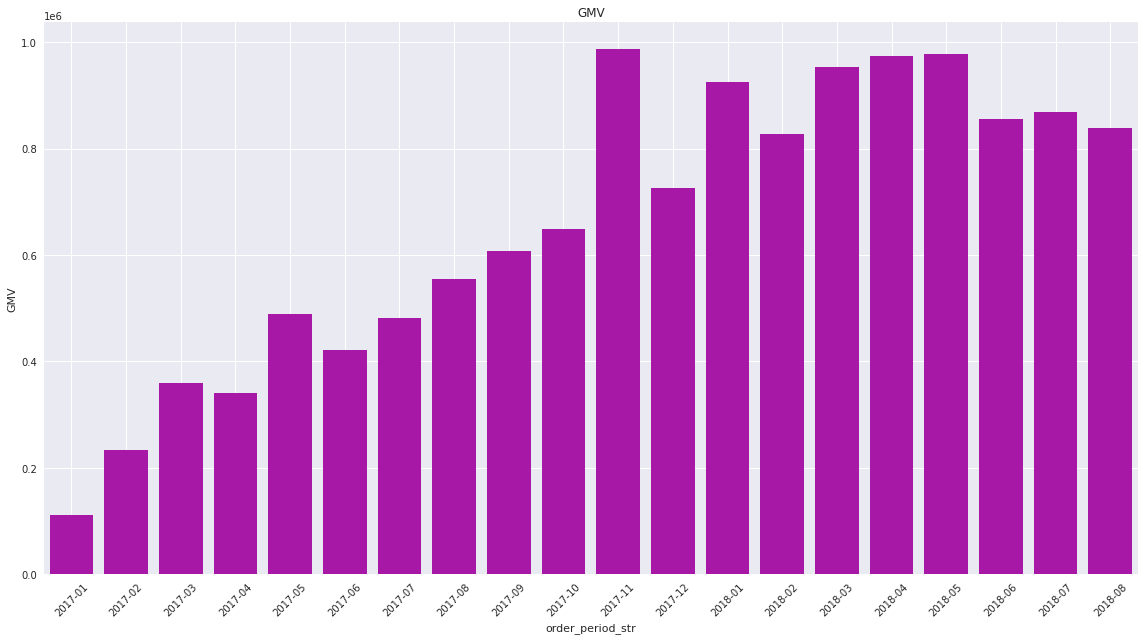

In [43]:
plt.figure(figsize=(16, 9))
sns.barplot(x ='order_period_str', y='price',data = gmv_agg, color='m')
plt.title('GMV')
plt.ylabel('GMV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Визуализируем вторую метрику - MAU

In [44]:
mau = client_orders_delivered.groupby('order_period', as_index=False)\
    .agg({'customer_unique_id':'nunique'})\
    .rename(columns={'customer_unique_id':'unique_clients'})

In [45]:
mau['order_period_str'] = mau['order_period'].astype(str)

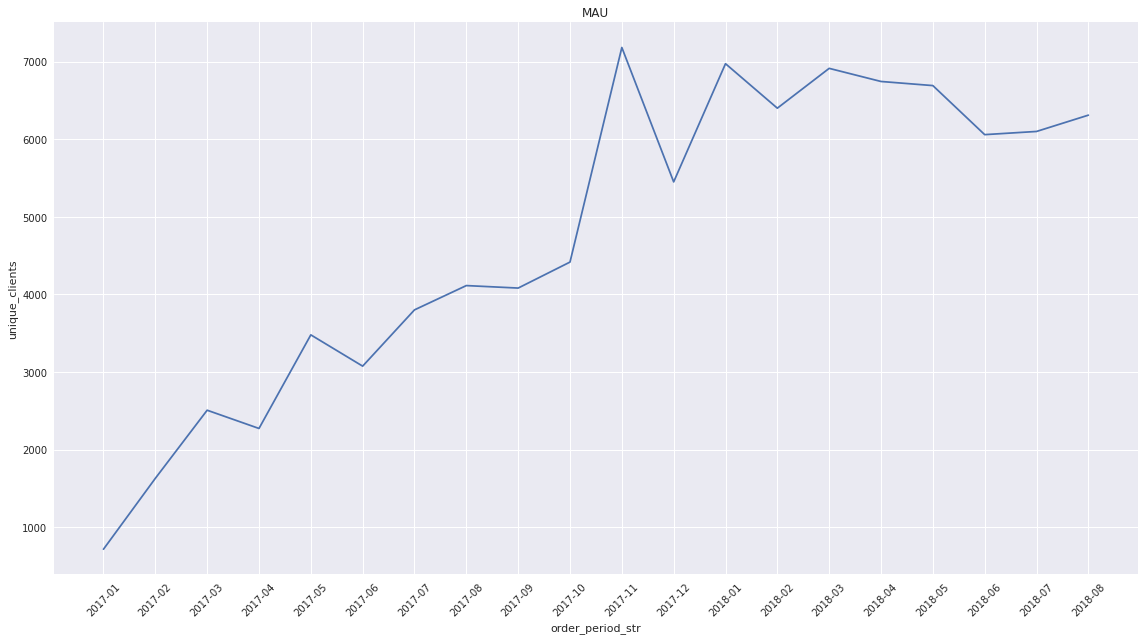

In [46]:
plt.figure(figsize=(16, 9))
sns.lineplot(x ='order_period_str', y='unique_clients',data = mau)
plt.title('MAU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Визуализируем четвертую метрику - Конверсия во вторую покупку

In [47]:
client_orders_delivered.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_period,order_period_day,cohort,cohort_day,period_number_month,delivered_time,delayed_delivery
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05-16,2017-05,2017-05-16,0.0,8 days 19:30:00,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018-01-12,2018-01,2018-01-12,0.0,16 days 15:52:55,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018-05-19,2018-05,2018-05-19,0.0,26 days 01:51:06,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018-03-13,2018-03,2018-03-13,0.0,14 days 23:57:47,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018-07-29,2018-07,2018-07-29,0.0,11 days 11:04:18,0


In [48]:
metric4 = client_orders_delivered.groupby(['customer_unique_id', 'order_period'], as_index=False)\
    .agg({'customer_id':'nunique'})\
    .rename(columns={'customer_id':'orders_count'})

In [49]:
repeat_clients = metric4.query("orders_count>=2")

In [50]:
cohort_conversion = repeat_clients.groupby('order_period')['customer_unique_id'].nunique() / \
                    metric4.groupby('order_period')['customer_unique_id'].nunique() * 100
cohort_conversion = cohort_conversion.reset_index(name='conv')

In [51]:
cohort_conversion['order_period_str'] = cohort_conversion['order_period'].astype(str)

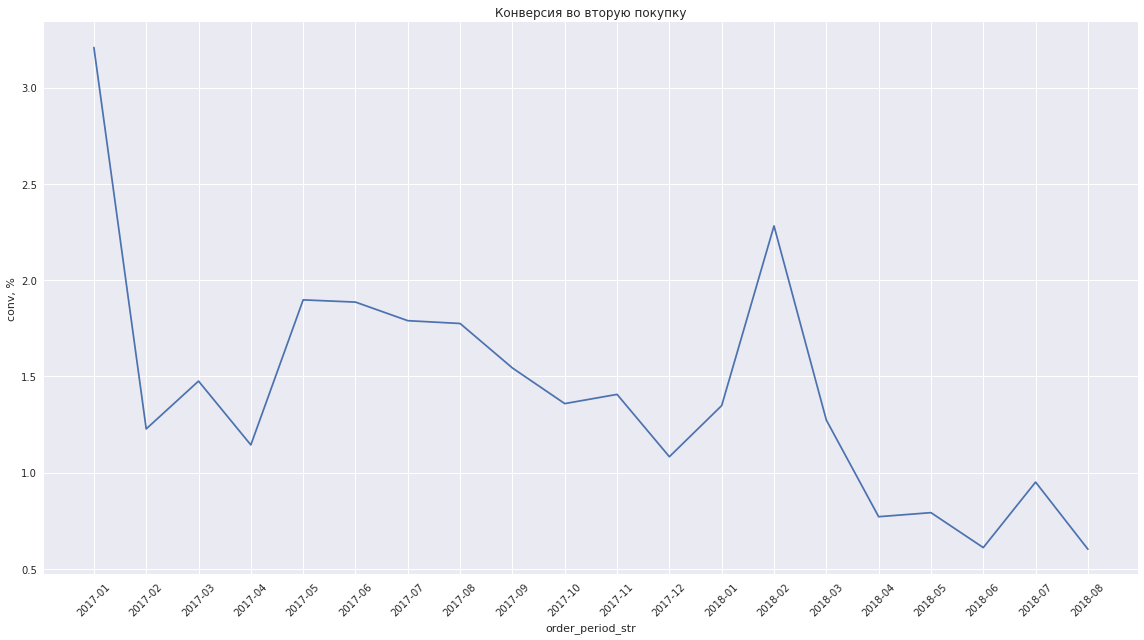

In [52]:
plt.figure(figsize=(16, 9))
sns.lineplot(x ='order_period_str', y='conv',data = cohort_conversion)
plt.title('Конверсия во вторую покупку')
plt.ylabel("conv, %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Визуализируем пятую метрику - ARPU

In [53]:
arpu = gmv_agg.merge(mau[['order_period', 'unique_clients']], on='order_period', how='left')

In [54]:
arpu['ARPU']=arpu.price / arpu.unique_clients
arpu

,order_period,price,all_sum,order_period_str,unique_clients,ARPU
0,2017-01,111787.46,111787.46,2017-01,717,155.909986
1,2017-02,234223.40,346010.86,2017-02,1630,143.695337
2,2017-03,359198.85,705209.71,2017-03,2508,143.221232
3,2017-04,340569.69,1045779.40,2017-04,2273,149.832684
4,2017-05,489338.25,1535117.65,2017-05,3479,140.654858
5,2017-06,421923.37,1957041.02,2017-06,3076,137.166245
6,2017-07,481265.52,2438306.54,2017-07,3801,126.615501
7,2017-08,554699.70,2993006.24,2017-08,4114,134.832207
8,2017-09,607350.67,3600356.91,2017-09,4082,148.787523
9,2017-10,648247.65,4248604.56,2017-10,4417,146.761976


In [55]:
arpu['order_period_str'] = arpu['order_period'].astype(str)

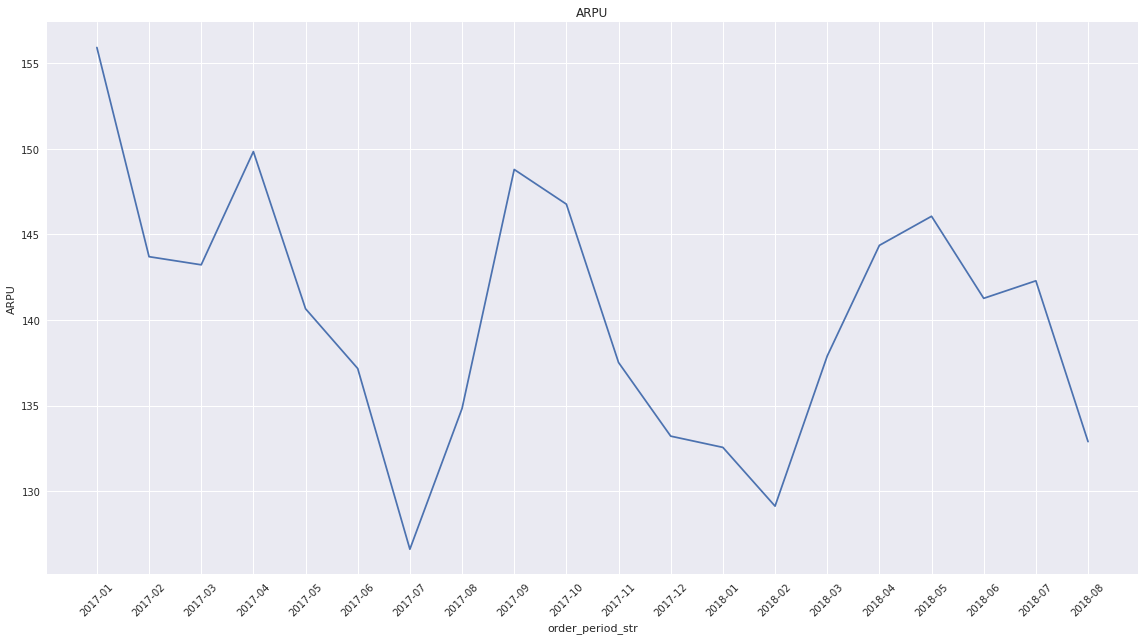

In [56]:
plt.figure(figsize=(16, 9))
sns.lineplot(x ='order_period_str', y='ARPU',data = arpu)
plt.title('ARPU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

**Задача 4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.**

Для вычисление impact нам понадобится значение влияния пролукта. Для этого будем вычислять количество пользователей, для которых внедрение гипотезы решило бы проблему.

**Гипотеза 1** Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

Confidence = 8

Easy = 6

In [57]:
orders_all_2017_06 = client_orders_all.query('order_purchase_timestamp > "2017-06"')

In [58]:
#Изпользуем только canceled, так как на unavailable наша гипотеза не должна повлиять
hyp_1 = orders_all_2017_06.query('order_status == "canceled"')

In [59]:
hyp_1.order_purchase_timestamp.min()

Timestamp('2017-06-05 21:20:51')

In [60]:
hyp_1.customer_unique_id.nunique()

490

Таким образом, избавившись от всех отмен мы дополнительно получили 490 уникальных клиентов.  
Это соответствует Impact = 4.

**Гипотеза 2** Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

Confidence = 10

Easy = 4

In [61]:
orders_late = orders_all_2017_06.query('order_estimated_delivery_date < order_delivered_customer_date').customer_unique_id.count()
orders_late

7296

Предположим, что данная гипотеза увеличит конверсию в повторный заказ на 5 п.п. Тогда:

In [62]:
orders_late * 0.05

364.8

Таким образом из тех 7296 клиентов, у которых заказ пришел с запазданием, только 365 человек закажет что-то еще раз.  
Это соответствует Impact = 4.

**Гипотеза 3** Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

Confidence = 5

Easy = 9

У нас есть такие заказы, у которых есть дата создания заказа, но нет время подтверждения оплаты заказа (order_approved_at). Это значит, что пользователь столкнулся с трудностями в оплате заказа.

In [63]:
zero_approved = orders_all_2017_06.order_approved_at.isna().sum()

Также посчитаем, сколько клиентов ждали подтверждение заказа больше 1 дня.

In [64]:
more_then_1_day = orders_all_2017_06[orders_all_2017_06.order_approved_at - orders_all_2017_06.order_purchase_timestamp > pd.Timedelta(days=1)].order_id.nunique()

Предположим, что данная гипотеза увеличит конверсию в повторный заказ на 3 п.п. Тогда:

In [65]:
(zero_approved +more_then_1_day)* 0.03

461.7

Таким образом из тех 15390 клиентов, у которых заказ пришел с запазданием, только 462 человека закажет что-то еще раз.  
Это соответствует Impact = 4.

In [66]:
#Вычисляем ICE для гипотезы 1
ice_1 = 4 * 8 * 6
ice_1

192

In [67]:
#Вычисляем ICE для гипотезы 2
ice_2 = 4 * 10 * 4
ice_2

160

In [68]:
#Вычисляем ICE для гипотезы 3
ice_3 = 4 * 5 * 9
ice_3

180

Делаем вывод, что первостепенно необходимо проверять гипотезу 1, второй на очередь может стать гипотеза 3 и в последнюю очередь можно проверить гипотезу 2.

**Задача 5. Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.**

Итак, на предыдущем шаге мы выбрали для первостепенной проверки гипотезу 1, так как она имела наибольший ICE.

**Гипотеза 1** Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

Метрики, на которые повлияет гипотеза: 
1. **Доля успешных заказов**
2. **Выручка**. Чем меньше клиентов будет отменять заказ, тем больше выручки мы получим.  
3. Также гипотеза повлияет на **retention**. Клиенты, делающие заказ, перестанут испытывать проблему с отменой заказа, мнение о нашем маркетплейсе улучшится и retention увеличится.
4. **Конверсия во вторую покупку**
5. **Кол-во обращений в поддержку**. Из-за исправления бага клиенты будут реже обращаться в поддержку с проблемой отмены заказа.

**Целевые метрики** - это такие метрики, по которым мы можем измерить успех гипотезы. Например, доля успешных заказов, конверсия в успешный заказ, выручка.  
**Прокси-метрики** - это такие метрики,которые могут быстрее оценить результат, чем целевые метрики. Например, количество отмененных заказов (должна упасть).  
**Guardrail метрики** - это метрики "безопасности", которые недолжны упасть. Например, кол-во обращений в поддержку, время доставки (так как заказов станет больше, могут возникнуть проблемы с доставкой).

**Задача 6. Теперь необходимо поделиться результатами проведённой работы с компанией.**

Итак, ко мне пришел продакт-менеджер Петя, который переживает за свой продукт, так как выручка его маркетплейса стоит на месте уже несколько месяцев. Моей задачей было выяснить, окупается ли продукт, в чем заключаются проблемы продукта, определить метрики для лучшего решения проблем продукта, выбрать гипотезу с которой нужно работать первостепенно. 

После анализа предоставленных данных можно сказать, что у продукта очень низкий процент retention. Так как продукт является маркетплейсом, процент retention является очень важным. Поэтому необходимо было найти причину такого низкого показателя и его улучшить.


1. Мною был определен месячный retention в оформление заказа с помощью когорного анализа. Результаты говорят нам о том, что медианный retention 1 месяца равен 0.35%. Максимально высокий retention за все время наблюдался 2017-01 и был равен 1%.  

    Отсюда можно сделать вывод, что пользователи практически не остаются с нами после первого заказа. Значит что-то в моменте оформления/оплаты/доставки заказа клиенту не понравилось.

2. Опредлила, что у продукта отсутствует Product/market fit. Это подтверждает низкий retention и вычисленное среднее количество заказов одного клиента, равное 1,033 заказа. Возможными причинами могут быть плохой PCF, выстроен неверный таргетинг, проблемы с доставкой, проблемы при оплате или оформлении заказа. 

3. Определила 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании: GMV, MAU, конверсия в покупку на нового клиента, конверсия в вторую покупку, ARPU.

4. С помощью фреймворка ICE мною было сделано ранжирование гипотез и выбрана та, которая будет максимально эффективной. Это оказалась гипотеза 1.

5. После выбора гипотезы мною были сформулированы нужные метрики, на которые гипотеза должна повлиять. В качестве целевой метрики я выбрала конверсию в успешный заказ, в качестве proxy-метрики я выбрала кол-во отмененных заказов, а в роли guardrail метрики я бы советовала использовать кол-во обращений в поддержку.

**Общие выводы:**  
В данном продукте существует проблема большого оттока клиентов после первой покупки, из-за чего получается крайние низкий показать retention. Для решения этой проблемы была выдвинута гипотеза, благодаря которой ситуация с большим количеством уходящих клиентов должна улучшиться.

**Рекоментации:**
Также после проведения A/B-теста с гипотезой 1 следует обратить внимание на другие гипотезы. Гипотеза 3 может помочь продукту увеличить конверсию во второй заказ, что улучшит продукт. А гипотеза 2 может позволит уменьшить процент заказов пришедших с опозданием. Это скажется как на конверсию в следующую покупку, так и просто на мнение клиентов о продукте в лучшую сторону! Так же можно смотреть на тренды: какие товары имеют большой спрос, какие нет. И в соответствии с этим пополять заказ нужным количеством товаров.  